# Project: Titanic Survival Prediction ¶

## Data: train.csv and test.csv


## Objective: Predict which passengers are more likely to survive

In [199]:
import pandas as pd
pd.set_option("display.max_columns",100)
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB



/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [200]:
titanicTrainDataset = pd.read_csv('train.csv')
titanicTestDataset = pd.read_csv('test.csv')
survivedValuesForTestData = pd.read_csv('gender_submission.csv')

In [201]:
titanicTrainDataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [202]:
#sex'i  bir ve sıfıra döndür. 
#name'i gönderme

In [203]:
titanicTrainDataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [204]:
abs(titanicTrainDataset.corr()["Survived"]).sort_values(ascending=False)

Survived       1.000000
Pclass         0.338481
Fare           0.257307
Parch          0.081629
Age            0.077221
SibSp          0.035322
PassengerId    0.005007
Name: Survived, dtype: float64

# EDA - EXPLOTARY DATA ANALYSIS

In [205]:
titanicTrainDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [206]:
titanicTrainDataset.shape

(891, 12)

In [207]:
titanicTrainDataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [208]:
titanicTrainDataset.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,NaN,S


In [209]:
titanicTrainDataset.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [210]:
titanicTrainDataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [211]:
titanicTrainDataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [212]:
titanicTrainDataset['Age'].isnull().sum()

177

In [213]:
titanicTrainDataset['Age'].mean()

29.69911764705882

In [214]:
titanicTrainDataset['Age'].std()

14.526497332334044

In [215]:
titanicTrainDataset['Fare'].fillna(titanicTrainDataset['Fare'].median(), inplace=True)

titanicTrainDataset['Embarked'] = titanicTrainDataset['Embarked'].fillna('S')

titanicTrainDataset['Age'].fillna(titanicTestDataset['Age'].median(), inplace=True)

titanicTrainDataset['Cabin'] = titanicTrainDataset['Cabin'].fillna('Unknown')


#titanicTestDataset['Fare'].fillna(titanicTestDataset['Fare'].median(), inplace=True)

#titanicTestDataset['Embarked'] = titanicTestDataset['Embarked'].fillna('S')

#titanicTestDataset['Age'].fillna(titanicTestDataset['Age'].median(), inplace=True)

#titanicTestDataset['Cabin'] = titanicTestDataset['Cabin'].fillna('Unknown')



In [216]:
#titanicTrainDataset.loc[(titanicTrainDataset['Age'] > 16) & (titanicTrainDataset['Age'] <= 32), 'Age'] = 
#titanicTrainDataset.loc[(titanicTrainDataset['Age'] > 32) & (titanicTrainDataset['Age'] <= 48), 'Age'] = 2
#titanicTrainDataset.loc[(titanicTrainDataset['Age'] > 48) & (titanicTrainDataset['Age'] <= 64), 'Age'] = 3
#titanicTrainDataset.loc[ titanicTrainDataset['Age'] > 64, 'Age'] = 4 

#titanicTestDataset.loc[(titanicTestDataset['Age'] > 16) & (titanicTestDataset['Age'] <= 32), 'Age'] = 1
#titanicTestDataset.loc[(titanicTestDataset['Age'] > 32) & (titanicTestDataset['Age'] <= 48), 'Age'] = 2
#titanicTestDataset.loc[(titanicTestDataset['Age'] > 48) & (titanicTestDataset['Age'] <= 64), 'Age'] = 3
#titanicTestDataset.loc[ titanicTestDataset['Age'] > 64, 'Age'] = 4 

In [217]:
titanicTrainDataset.Embarked.unique()
#titanicTrainDataset.Embarked = [1 if emb == 'S' else emb for emb in titanicTrainDataset.Embarked]
#titanicTrainDataset.Embarked = [2 if emb == 'C' else emb for emb in titanicTrainDataset.Embarked]
#titanicTrainDataset.Embarked = [3 if emb == 'Q' else emb for emb in titanicTrainDataset.Embarked]

#titanicTestDataset.Embarked.unique()
#titanicTestDataset.Embarked = [1 if emb == 'S' else emb for emb in titanicTestDataset.Embarked]
#titanicTestDataset.Embarked = [2 if emb == 'C' else emb for emb in titanicTestDataset.Embarked]
#titanicTestDataset.Embarked = [3 if emb == 'Q' else emb for emb in titanicTestDataset.Embarked]

titanicTrainDataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,Unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [218]:
#titanicTrainDataset['Age'] = [int(x) for x in titanicTrainDataset.Age]
#titanicTrainDataset['Age']

#titanicTrainDataset['Fare'] = [int(x) for x in titanicTrainDataset.Fare]
#titanicTrainDataset['Fare']

#titanicTrainDataset['Embarked'] = [int(x) for x in titanicTrainDataset.Fare]
#titanicTrainDataset['Embarked']


#titanicTestDataset['Age'] = [int(x) for x in titanicTestDataset.Age]
#titanicTestDataset['Age']

#titanicTestDataset['Fare'] = [int(x) for x in titanicTestDataset.Fare]
#titanicTestDataset['Fare']

#titanicTestDataset['Embarked'] = [int(x) for x in titanicTestDataset.Fare]
#titanicTestDataset['Embarked']

In [219]:
titanicTrainDataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,Unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [220]:
#kategorik verimiz olan kabini numaraya çeviriyoruz
#titanicTrainDataset.Cabin = pd.Categorical(titanicTrainDataset.Cabin)
#titanicTrainDataset['CabinCode'] = titanicTrainDataset.Cabin.cat.codes
#titanicTrainDataset['CabinCode']

#titanicTestDataset.Cabin = pd.Categorical(titanicTestDataset.Cabin)
#titanicTestDataset['CabinCode'] = titanicTestDataset.Cabin.cat.codes
#titanicTestDataset['CabinCode']

In [221]:
#titanicTrainDataset.Sex = [1 if sex.lower() == 'female' else 0 for sex in titanicTrainDataset.Sex]

#titanicTestDataset.Sex = [1 if sex.lower() == 'female' else 0 for sex in titanicTestDataset.Sex]


In [222]:
#titanicTrainDataset['Family_Size'] = titanicTrainDataset['SibSp'] + titanicTrainDataset['Parch'] + 1
#titanicTrainDataset['IsAlone'] = 0
#titanicTrainDataset.loc[titanicTrainDataset['Family_Size']==1, 'IsAlone'] = 1
#titanicTrainDataset.head()


#titanicTestDataset['Family_Size'] = titanicTestDataset['SibSp'] + titanicTestDataset['Parch'] + 1
#titanicTestDataset['IsAlone'] = 0
#titanicTestDataset.loc[titanicTestDataset['Family_Size']==1, 'IsAlone'] = 1
#titanicTestDataset.head()

In [223]:
#titanicTrainDataset.Ticket.isnull().sum()
#kategorik verimiz olan kabini numaraya çeviriyoruz
#titanicTrainDataset.Ticket = pd.Categorical(titanicTrainDataset.Ticket)
#titanicTrainDataset['TicketCode'] = titanicTrainDataset.Ticket.cat.codes
#titanicTrainDataset['TicketCode']


#titanicTestDataset.Ticket.isnull().sum()
#kategorik verimiz olan kabini numaraya çeviriyoruz
#titanicTestDataset.Ticket = pd.Categorical(titanicTestDataset.Ticket)
#titanicTestDataset['TicketCode'] = titanicTestDataset.Ticket.cat.codes
#titanicTestDataset['TicketCode']

In [224]:
titanicTrainDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [225]:
titanicTestDataset.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Classificaiton'a başlıyoruz

In [226]:
abs(titanicTrainDataset.corr()["Survived"]).sort_values(ascending=False)


Survived       1.000000
Pclass         0.338481
Fare           0.257307
Parch          0.081629
Age            0.061956
SibSp          0.035322
PassengerId    0.005007
Name: Survived, dtype: float64

In [227]:
titanicTrainDataset.shape

(891, 12)

In [228]:
Y = titanicTrainDataset["Survived"]
X = titanicTrainDataset[["Pclass", "Sex", "SibSp", "Parch"]]
#[["Pclass", "Sex","Fare", "Embarked"]]
#,"CabinCode","IsAlone"
X = pd.get_dummies(X)
X_test = titanicTestDataset[["Pclass", "Sex", "SibSp", "Parch"]]
#[["Pclass", "Sex","Fare", "Embarked"]];
#,"CabinCode","IsAlone"
X_test = pd.get_dummies(X_test)

Y_test = survivedValuesForTestData.Survived

In [229]:
X.isnull().sum()

Pclass        0
SibSp         0
Parch         0
Sex_female    0
Sex_male      0
dtype: int64

## SVC - Support Vector Classificaiton

In [230]:
from sklearn.svm import SVC

In [231]:
svc = SVC()

In [232]:
svc.fit(X,Y)

SVC()

In [233]:
y_pred_for_SVC = svc.predict(X_test)

In [234]:
y_pred_for_SVC

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [235]:
confusion_matrix(Y_test,y_pred_for_SVC)

array([[266,   0],
       [  5, 147]])

In [236]:
classification_report(Y_test,y_pred_for_SVC)

'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99       266\n           1       1.00      0.97      0.98       152\n\n    accuracy                           0.99       418\n   macro avg       0.99      0.98      0.99       418\nweighted avg       0.99      0.99      0.99       418\n'

<AxesSubplot:>

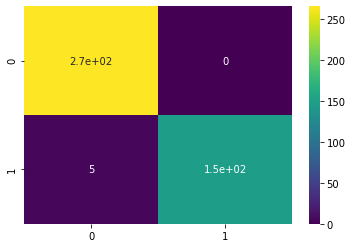

In [237]:
sns.heatmap(confusion_matrix(Y_test,y_pred_for_SVC), cmap='viridis', annot= True)

In [238]:
accuracy_score(Y_test,y_pred_for_SVC)


0.9880382775119617

In [239]:
precision_score(Y_test,y_pred_for_SVC, average='weighted')

0.9882589734988259

In [240]:
f1_score(Y_test,y_pred_for_SVC, average='weighted')

0.9879939508309682

In [241]:
recall_score(Y_test,y_pred_for_SVC, average='weighted')

0.9880382775119617

# KNeighbours 

In [242]:
from sklearn.neighbors import KNeighborsClassifier
k = KNeighborsClassifier()

In [243]:
k.fit(X,Y)

KNeighborsClassifier()

In [244]:
y_pred_for_KN = k.predict(X_test)

In [245]:
confusion_matrix(Y_test,y_pred_for_KN)

array([[249,  17],
       [ 20, 132]])

<AxesSubplot:>

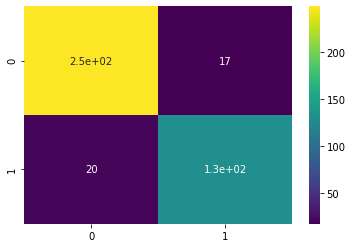

In [246]:
sns.heatmap(confusion_matrix(Y_test,y_pred_for_KN), cmap= 'viridis', annot = True)

In [247]:
accuracy_score(Y_test, y_pred_for_KN)

0.9114832535885168

In [248]:
confusion_matrix(Y_test,y_pred_for_KN)

array([[249,  17],
       [ 20, 132]])

In [249]:
classification_report(Y_test,y_pred_for_KN)

'              precision    recall  f1-score   support\n\n           0       0.93      0.94      0.93       266\n           1       0.89      0.87      0.88       152\n\n    accuracy                           0.91       418\n   macro avg       0.91      0.90      0.90       418\nweighted avg       0.91      0.91      0.91       418\n'

In [250]:
precision_score(Y_test,y_pred_for_KN, average='weighted')

0.9111980058563228

In [251]:
f1_score(Y_test,y_pred_for_KN, average='weighted')

0.9112903180279839

In [252]:
recall_score(Y_test,y_pred_for_KN, average='weighted')

0.9114832535885168

# Decision Tree

In [253]:
dt = DecisionTreeClassifier()

In [254]:
dt = dt.fit(X,Y)

In [255]:
y_pred_for_dt = dt.predict(X_test)

In [256]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_for_dt))

NameError: name 'metrics' is not defined

In [ ]:
accuracy_score(Y_test, y_pred_for_dt)

In [ ]:
confusion_matrix(Y_test, y_pred_for_dt)

In [ ]:
classification_report(Y_test, y_pred_for_dt)

In [ ]:
sns.heatmap(confusion_matrix(Y_test,y_pred_for_dt), cmap='viridis', annot= True)

In [ ]:
precision_score(Y_test, y_pred_for_dt, average='weighted')

In [ ]:
f1_score(Y_test,y_pred_for_dt, average='weighted')

In [ ]:
recall_score(Y_test,y_pred_for_dt, average='weighted')

[](http://)# Naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model = GaussianNB()

In [ ]:
model.fit(X,Y)

In [ ]:
y_pred_for_Naive= model.predict(X_test)

In [ ]:
y_pred_for_Naive

In [ ]:
accuracy_score(Y_test, y_pred_for_Naive)

In [ ]:
confusion_matrix(Y_test,y_pred_for_Naive)

In [ ]:
classification_report(Y_test,y_pred_for_Naive)

In [ ]:
sns.heatmap(confusion_matrix(Y_test,y_pred_for_Naive), cmap='viridis', annot= True)

In [ ]:
precision_score(Y_test,y_pred_for_Naive, average='weighted')

In [ ]:
f1_score(Y_test,y_pred_for_Naive, average='weighted')

In [ ]:
recall_score(Y_test,y_pred_for_Naive, average='weighted')

# SGD

In [ ]:
sgd = linear_model.SGDClassifier(max_iter=3, tol=None)

In [ ]:
sgd.fit(X, Y)

In [ ]:
Y_pred_for_sgd = sgd.predict(X_test)

In [ ]:
accuracy_score(Y_test, Y_pred_for_sgd)

In [ ]:
confusion_matrix(Y_test,Y_pred_for_sgd)

In [ ]:
classification_report(Y_test,Y_pred_for_sgd)

In [ ]:
sns.heatmap(confusion_matrix(Y_test,Y_pred_for_sgd), cmap='viridis', annot= True)

In [ ]:
precision_score(Y_test,Y_pred_for_sgd, average='weighted')

In [ ]:
f1_score(Y_test,Y_pred_for_sgd, average='weighted')

In [ ]:
recall_score(Y_test,Y_pred_for_sgd, average='weighted')

# rANDOM fOREST

In [ ]:
titanicTrainDataset

In [257]:

model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2)
model.fit(X, Y)
prediction_for_rf = model.predict(X_test)




In [258]:
accuracy_score(Y_test, prediction_for_rf)

0.9880382775119617

In [259]:
confusion_matrix(Y_test,prediction_for_rf)

array([[266,   0],
       [  5, 147]])

In [260]:
classification_report(Y_test,prediction_for_rf)

'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99       266\n           1       1.00      0.97      0.98       152\n\n    accuracy                           0.99       418\n   macro avg       0.99      0.98      0.99       418\nweighted avg       0.99      0.99      0.99       418\n'

<AxesSubplot:>

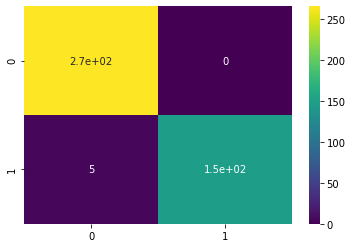

In [261]:
sns.heatmap(confusion_matrix(Y_test,prediction_for_rf), cmap='viridis', annot= True)

In [262]:
precision_score(Y_test,prediction_for_rf, average='weighted')

0.9882589734988259

In [263]:
f1_score(Y_test,prediction_for_rf, average='weighted')

0.9879939508309682

In [264]:
recall_score(Y_test,prediction_for_rf, average='weighted')

0.9880382775119617

# lOGİSTİC rEGRESSİON

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X, Y)

In [ ]:
Y_pred_for_lr = logreg.predict(X_test)

In [ ]:
accuracy_score(Y_test, Y_pred_for_lr)

In [ ]:
confusion_matrix(Y_test,Y_pred_for_lr)

In [ ]:
classification_report(Y_test,Y_pred_for_lr)

In [ ]:
sns.heatmap(confusion_matrix(Y_test,Y_pred_for_lr), cmap='viridis', annot= True)

In [ ]:
precision_score(Y_test,Y_pred_for_lr, average='weighted')

In [ ]:
f1_score(Y_test,Y_pred_for_lr, average='weighted')

In [ ]:
recall_score(Y_test,Y_pred_for_lr, average='weighted')

In [ ]:
Y_test.columns

# Şimdi test verilerimizi submit ediyoruz

In [265]:
submission = pd.DataFrame({'PassengerId':survivedValuesForTestData['PassengerId'],'Survived':prediction_for_rf})

#Visualize the first 5 rows
submission.head()

submission.to_csv('submission_titanic-not-fastai-4.csv', index=False)

In [266]:
kaggle competitions submit -c titanic -f submission_titanic.csv -m "Let's predict who gonna live or not on Titanic."

SyntaxError: invalid syntax (<ipython-input-266-217075bea26b>, line 1)